# How can you improve the value of your home?

## Introduction

For many Americans, the most important and valuable asset they own is their home. Owning a home is not just the American dream. Owning a home is an avenue to prosperity. The American real estate market is the most important in the world. Academia, TV shows, and books all offer tips on how to make money in the real estate industry. The goal of this project is to examine, using linear regression, how an existing homeowner can improve the value of their home. Using King County, WA sales data from 2014-15, I will determine which features are most valuable. 

This study will put a special focus on a few features: the home's **square footage, grade, and whether the home was renovated in the last 10 years**. Here are the definitions of the each feature:


Here are the definitions of each category: 
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

Ok, so let's start:

 ### Preliminary Steps and 1st Model

Importing relevant libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.read_csv('kc_house_data.csv')
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Let's examine the columns for shape and type:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Let's create a 'Month' columns:

In [3]:
df['Month'] = pd.DatetimeIndex(df['date']).month 
df['Month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: Month, Length: 21597, dtype: int64

In [4]:
df['Month'].value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: Month, dtype: int64

Now, this study aims to examine the effect of features that an existing homeowner can control. Therefore, feature like 'zipcode', 'view', 'waterfront', 'sqft_living15', 'sqft_lot15', 'lat' , and 'long' should be eliminated because they are irrelevant. An existing homeowner cannot change any of these factors.

In [5]:
relevant_columns = ['price', 'bedrooms', 'bathrooms','sqft_living', 'floors', 'condition','yr_renovated','Month', 'grade']
                    
df = df.loc[:, relevant_columns]
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7 Average
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7 Average
2,180000.0,2,1.00,770,1.0,Average,NaN,2,6 Low Average
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7 Average
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8 Good
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8 Good
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8 Good
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7 Average
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8 Good


Ok, so that's the new DataFrame. Now, let's look at the correlations.

Correlation Heat Map:

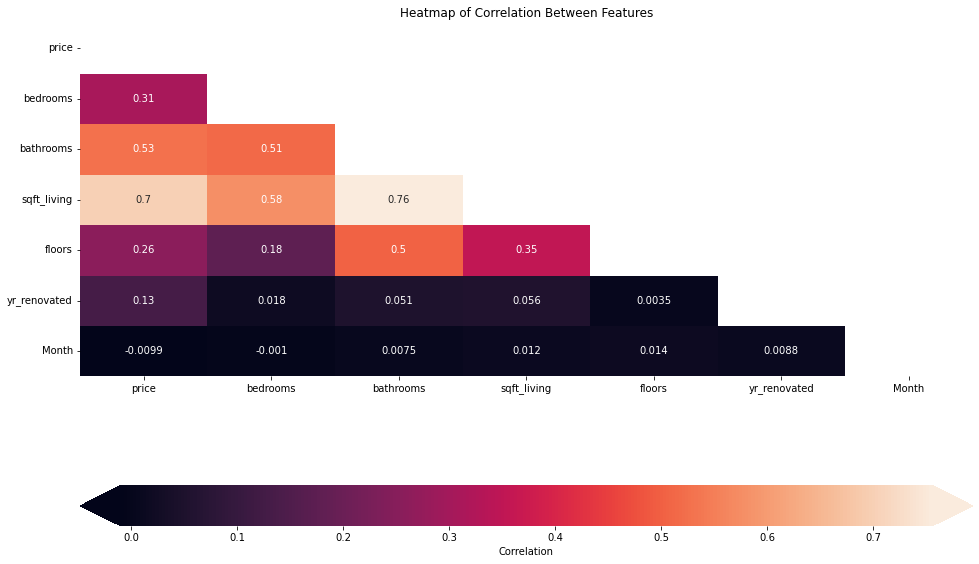

In [6]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(
    data=df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)
ax.set_title("Heatmap of Correlation Between Features");

'Sqft_Living' has the highest correlation with 'price'. Let's look at scatter plots and histograms to check  linearity and whether each variable is uniformly distributed.

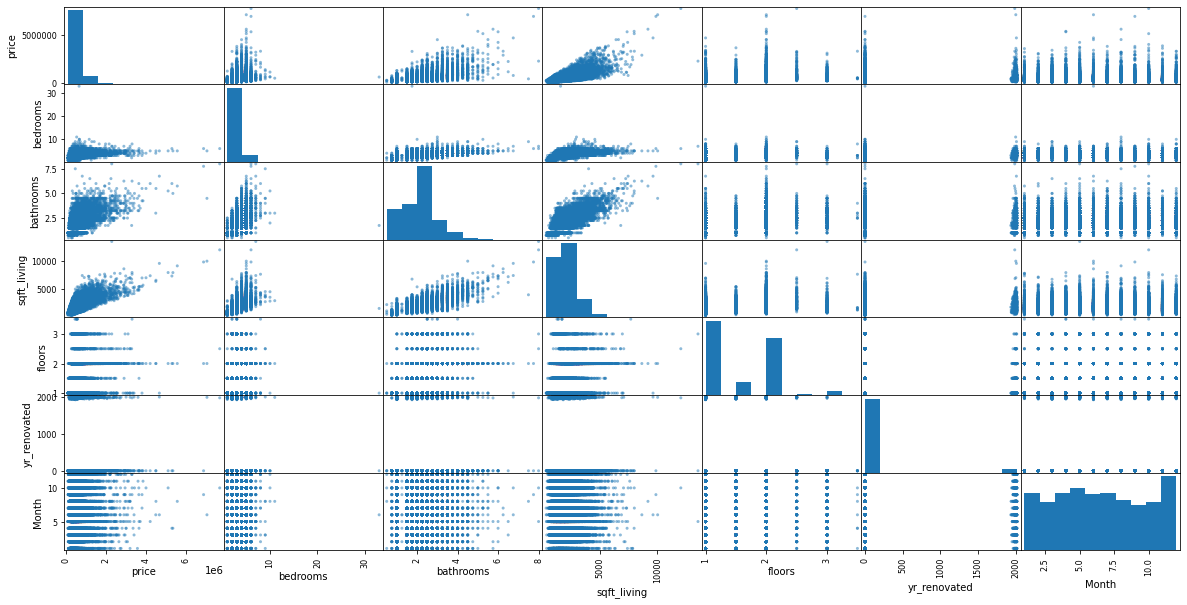

In [7]:
pd.plotting.scatter_matrix(df[df.columns], figsize=(20,10));

Above are histograms and scatter plots for all the numerical categories. As you can see, none of them are normally distrubuted. Now, let's take a closer look at 'sqft_living' and price:

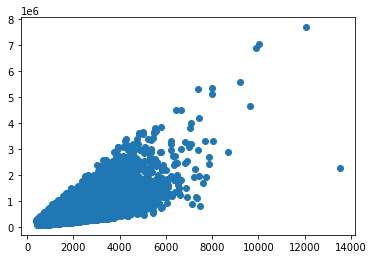

In [8]:
plt.scatter(df.sqft_living, df.price);

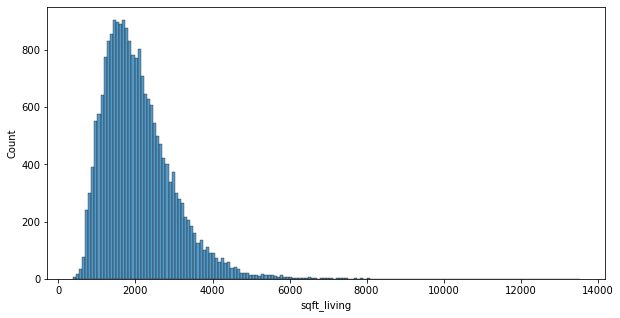

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['sqft_living']);

The relationship is certainly linear but it isn't normally distributed. Let's look at the distributions of some of the other variables.

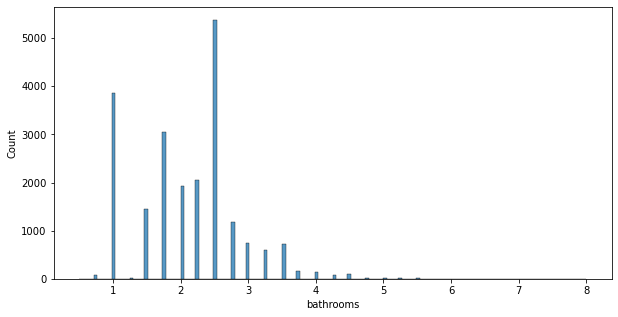

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['bathrooms']);

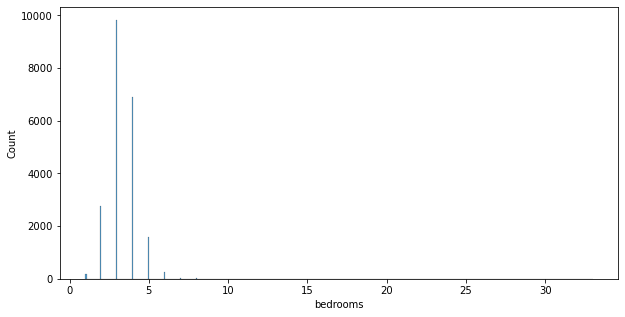

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['bedrooms']);

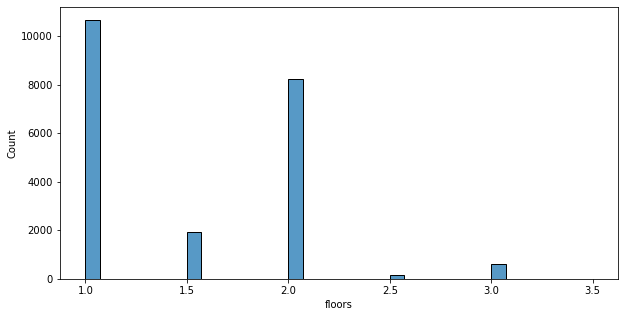

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['floors']);

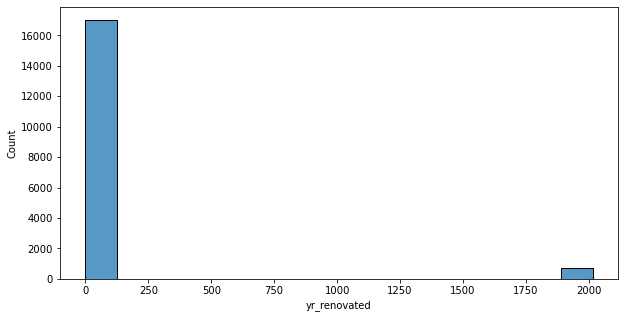

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['yr_renovated']);

Ok, so it looks like it's best to use 'sqft_living' for our independent variable. So, let's do it:

In [14]:
X_baseline= df['sqft_living']
y_baseline= df['price']
X_baseline

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

In [15]:
X_baseline= sm.add_constant(X_baseline)

baseline_model=sm.OLS(endog=y_baseline, exog=X_baseline).fit()

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        17:23:30   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


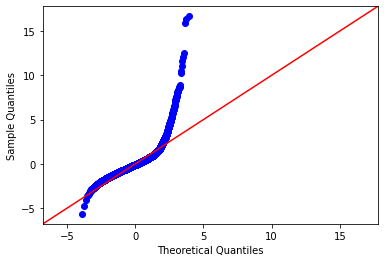

In [17]:
residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45',)
plt.show()

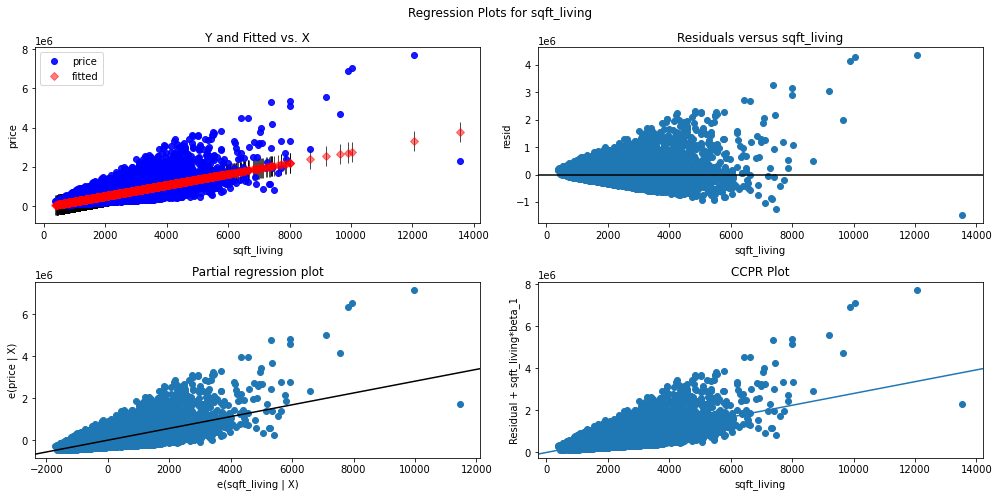

In [18]:
sm.graphics.plot_regress_exog(baseline_model, 'sqft_living', fig=plt.figure(figsize=(14,7)));

Ok, it really isn't a great fit at all and the residuals are not homoscedastic. ***Let's improve by adding more features.***

### Data Preparation ,Cleaning, and Preprocessing

So, before we add more features, let's get it ready for processing. Here's what needs to be done:

1. The null-values for 'yr_renovated' need to be eliminated. 
2. 'Grade', 'Condition', and 'Month' must be OneHot Encoded

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   floors        21597 non-null  float64
 5   condition     21597 non-null  object 
 6   yr_renovated  17755 non-null  float64
 7   Month         21597 non-null  int64  
 8   grade         21597 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 1.5+ MB


Fill in null values for 'yr_renovated' with 0. 0 is actually the mode of this column so it's a good pick.

In [20]:
df['yr_renovated'].fillna(0.0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   floors        21597 non-null  float64
 5   condition     21597 non-null  object 
 6   yr_renovated  21597 non-null  float64
 7   Month         21597 non-null  int64  
 8   grade         21597 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 1.5+ MB


Check for null-values:

In [21]:
df['yr_renovated'].isna().value_counts()


False    21597
Name: yr_renovated, dtype: int64

Now, let's take a look at the new column:

In [22]:
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7 Average
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7 Average
2,180000.0,2,1.00,770,1.0,Average,0.0,2,6 Low Average
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7 Average
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8 Good
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8 Good
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8 Good
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7 Average
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8 Good


### OneHot Encoding categories

Now, let's use OneHot Encoding on the categorical variables!

In [23]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [24]:
new_grades = {'3 Poor':3, '4 Low':4, '5 Fair':5, '6 Low Average':6, '7 Average': 7, '8 Good': 8, '9 Better': 9, 
             '10 Very Good':10, '11 Excellent':11, '12 Luxury':12, '13 Mansion':13}
df['grade'].replace(new_grades, inplace=True)

Our new category inside df:

In [25]:
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7
2,180000.0,2,1.00,770,1.0,Average,0.0,2,6
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8


Now onto OneHot Encoding for condition and leave out  'Average':

In [26]:
from sklearn.preprocessing import OneHotEncoder
Conditions = df[['condition']]
ohe = OneHotEncoder(drop='first')
Condition_num = ohe.fit_transform(Conditions)
Condition_num

<21597x4 sparse matrix of type '<class 'numpy.float64'>'
	with 7577 stored elements in Compressed Sparse Row format>

In [27]:
Condition_df = pd.DataFrame(Condition_num.todense(), columns=ohe.get_feature_names())
Condition_df.head()

,x0_Fair,x0_Good,x0_Poor,x0_Very Good
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0


Now let's use the OneHot Encoder for 'Month' and leave out the 1st month:

In [28]:
Months = df[['Month']]
ohe = OneHotEncoder(drop='first')
Months = ohe.fit_transform(Months)
Months

<21597x11 sparse matrix of type '<class 'numpy.float64'>'
	with 20619 stored elements in Compressed Sparse Row format>

In [29]:
Month_df = pd.DataFrame(Months.todense(), columns=ohe.get_feature_names())
Month_df.head()

,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_9,x0_10,x0_11,x0_12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ok, with that done, it's important to change the column names:

In [30]:
Month_df.columns = ['February', 'March', 'April', 'May', 'June', 'July', 'August', 
                        'September', 'October', 'November','December']
Month_df

,February,March,April,May,June,July,August,September,October,November,December
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
Condition_df.columns = ['Fair', 'Good', 'Poor', 'Very Good']
Condition_df

,Fair,Good,Poor,Very Good
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
21592,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0


Creating a Completed Renovations Column and a Recent renovations Column:

In [32]:
df['Completed_renovation']=df['yr_renovated'] > 1


In [33]:
df['Recent_Renovation']=df['yr_renovated'] > 2004.0

In [34]:
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade,Completed_renovation,Recent_Renovation
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7,False,False
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7,True,False
2,180000.0,2,1.00,770,1.0,Average,0.0,2,6,False,False
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7,False,False
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8,False,False
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8,False,False
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8,False,False
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7,False,False
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8,False,False


OneHot Encoding for those two columns:

In [35]:
Finished_Reno = df[['Completed_renovation']]
ohe = OneHotEncoder(drop='if_binary')
Finished_Reply = ohe.fit_transform(Finished_Reno)
Finished_Reply

<21597x1 sparse matrix of type '<class 'numpy.float64'>'
	with 744 stored elements in Compressed Sparse Row format>

In [36]:
Finished_df = pd.DataFrame(Finished_Reply.todense(), columns=ohe.get_feature_names())
Finished_df.head()

,x0_True
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [37]:
Finished_df.columns = ['Completed Renovation']
Finished_df

,Completed Renovation
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
21592,0.0
21593,0.0
21594,0.0
21595,0.0


In [38]:
Recent_reno = df[['Recent_Renovation']]
ohe = OneHotEncoder(drop='if_binary')
Recent_renovation = ohe.fit_transform(Recent_reno)
Recent_renovation;

In [39]:
Recent_df = pd.DataFrame(Recent_renovation.todense(), columns=ohe.get_feature_names())
Recent_df.head()

,x0_True
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [40]:
Recent_df.columns = ['Recently Renovated']
Recent_df

,Recently Renovated
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
21592,0.0
21593,0.0
21594,0.0
21595,0.0


Now, 'grade' will be OneHot Encoded but instead of dropping the 1st grade, '3', '6' will be dropped. King County defines a grade of '6' as "Lowest grade currently meeting building code. Low quality materials and simple designs". 

In [41]:
Grades = df[['grade']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(Grades)
ohe.categories_

[array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)]

In [42]:
Grades_encoded = ohe.transform(Grades)
Grades_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
Grades_df = pd.DataFrame(Grades_encoded, columns=ohe.categories_[0], index=df.index)
Grades_df.columns = Grades_df.columns.astype(str)
Grades_df

,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
Grades_df= Grades_df.drop('6', axis=1)
Grades_df

,3,4,5,7,8,9,10,11,12,13
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
Grades_df.value_counts()

3    4    5    7    8    9    10   11   12   13 
0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    8974
               0.0  1.0  0.0  0.0  0.0  0.0  0.0    6065
                    0.0  1.0  0.0  0.0  0.0  0.0    2615
                         0.0  0.0  0.0  0.0  0.0    2038
                              1.0  0.0  0.0  0.0    1134
                              0.0  1.0  0.0  0.0     399
          1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     242
          0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      89
     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      27
     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      13
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1
dtype: int64

Combining numerical features:

In [46]:
Categoricals= pd.concat((Recent_df, Finished_df, Condition_df, Month_df,Grades_df), axis=1)
Categoricals

,Recently Renovated,Completed Renovation,Fair,Good,Poor,Very Good,February,March,April,May,...,3,4,5,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Combining DataFrames:

In [47]:
df_full= pd.concat((df, Categoricals), axis=1)
df_full

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade,Completed_renovation,...,3,4,5,7,8,9,10,11,12,13
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,1.0,Average,0.0,2,6,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Another correlation map but this time with all the relevant features:

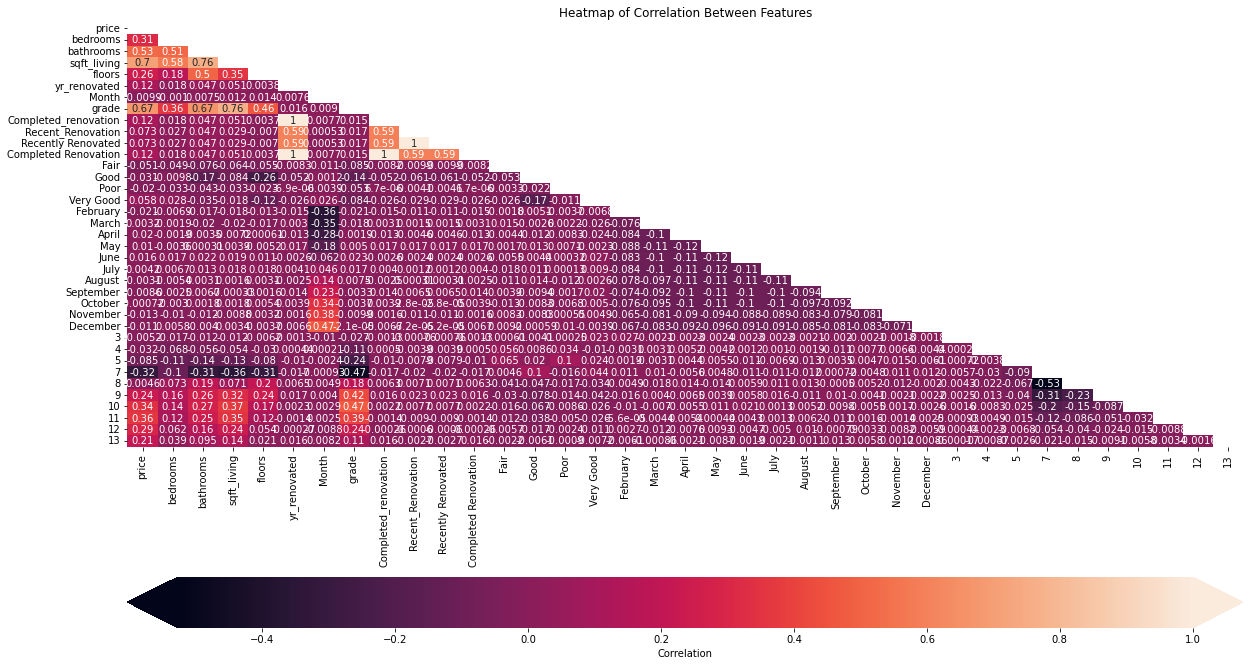

In [48]:
df_corr_2 = df_full.corr()

fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(
    data=df_corr_2,
    mask=np.triu(np.ones_like(df_corr_2, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)
ax.set_title("Heatmap of Correlation Between Features");

Some of the correlations are on the Boolean columns will probably create noise in the model.

On to the model:

In [49]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 21597 non-null  float64
 1   bedrooms              21597 non-null  int64  
 2   bathrooms             21597 non-null  float64
 3   sqft_living           21597 non-null  int64  
 4   floors                21597 non-null  float64
 5   condition             21597 non-null  object 
 6   yr_renovated          21597 non-null  float64
 7   Month                 21597 non-null  int64  
 8   grade                 21597 non-null  int64  
 9   Completed_renovation  21597 non-null  bool   
 10  Recent_Renovation     21597 non-null  bool   
 11  Recently Renovated    21597 non-null  float64
 12  Completed Renovation  21597 non-null  float64
 13  Fair                  21597 non-null  float64
 14  Good                  21597 non-null  float64
 15  Poor               

Let's eliminate the Boolean values and the the categorical value 'condition':

In [50]:
df_full= df_full.drop(['condition','Completed_renovation', 'Recent_Renovation'], axis=1)

Onto the model:

In [51]:
X_model_2= df_full.drop('price', axis=1)
y_model_2= df_full['price']

In [52]:
X_model_2= sm.add_constant(X_model_2)
Second_model=sm.OLS(endog=y_model_2, exog=X_model_2).fit()

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
Second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1052.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        17:23:37   Log-Likelihood:            -2.9723e+05
No. Observations:               21597   AIC:                         5.945e+05
Df Residuals:                   21564   BIC:                         5.948e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.871e+05   2.97e+04    -29.880      0.000   -9.45e+05   -8.29e+05
bedrooms             -2.536e+04   2186.399    -11.600      0.000   -2.96e+04   -2.11e+04
bathrooms             1007.3431   3511.383      0.287      0.774   -5875.228    7889.915
sqft_living            166.7082      3.548     46.987      0.000     159.754     173.662
floors               -2243.3216   3619.198     -0.620      0.535   -9337.218    4850.575
yr_renovated          4259.9243    750.815      5.674      0.000    2788.271    5731.578
Month                 -656.2639    977.361     -0.671      0.502   -2571.963    1259.435
grade                 1.664e+05   4751.435     35.027      0.000    1.57e+05    1.76e+05
Recently Renovated   -5.449e+04   2.44e+04     -2.234      0.026   -1.02e+05   -6673.136
Completed Renovation -8.285e+06   1.49e+06     -5.551      0.000   -1.12e+07   -5.36e+06
Fair                  7526.7831   1.79e+04      0.420      0.674   -2.76e+04    4.26e+04
Good                  6.703e+04   3816.352     17.563      0.000    5.95e+04    7.45e+04
Poor                  6.455e+04    4.3e+04      1.500      0.134   -1.98e+04    1.49e+05
Very Good             1.559e+05   6046.942     25.781      0.000    1.44e+05    1.68e+05
February              6034.3452   9130.809      0.661      0.509   -1.19e+04    2.39e+04
March                 4.027e+04   7607.214      5.293      0.000    2.54e+04    5.52e+04
April                 4.824e+04   6625.511      7.281      0.000    3.53e+04    6.12e+04
May                   1.897e+04   5859.980      3.238      0.001    7488.105    3.05e+04
June                  1.609e+04   5517.507      2.917      0.004    5279.877    2.69e+04
July                  8052.1641   5070.305      1.588      0.112   -1886.008     1.8e+04
August                7509.7420   5071.221      1.481      0.139   -2430.226    1.74e+04
September             6222.0156   5144.049      1.210      0.226   -3860.702    1.63e+04
October               1.751e+04   5069.757      3.454      0.001    7574.586    2.74e+04
November              1.144e+04   5790.484      1.976      0.048      90.228    2.28e+04
December              6917.5162   5983.018      1.156      0.248   -4809.642    1.86e+04
3                     4.293e+05   2.19e+05      1.958      0.050    -478.977    8.59e+05
4                     3.115e+05   4.47e+04      6.964      0.000    2.24e+05    3.99e+05
5                     1.366e+05   1.64e+04      8.320      0.000    1.04e+05    1.69e+05
7                    -1.277e+05   6932.239    -18.428      0.000   -1.41e+05   -1.14e+05
8                     -2.22e+05   1.03e+04    -21.511      0.000   -2.42e+05   -2.02e+05
9                     -2.59e+05   1.45e+04    -17.900      0.000   -2.87e+05   -2.31e+05
10                   -2.289e+05    1.9e+04    -12.024    

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


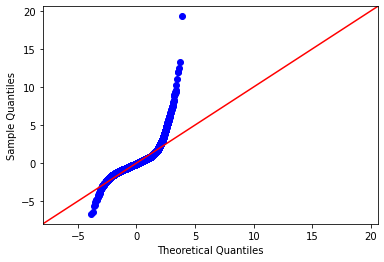

In [54]:
residuals = Second_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45',)
plt.show()

Again, this model violates the assumption of normality of errors so we need to do a few things to change the data. Now let's look at scedasticity. Now, the feature that accounts for 49% of the variation, sqft_living, will still have residuals that are heteroscedastic.

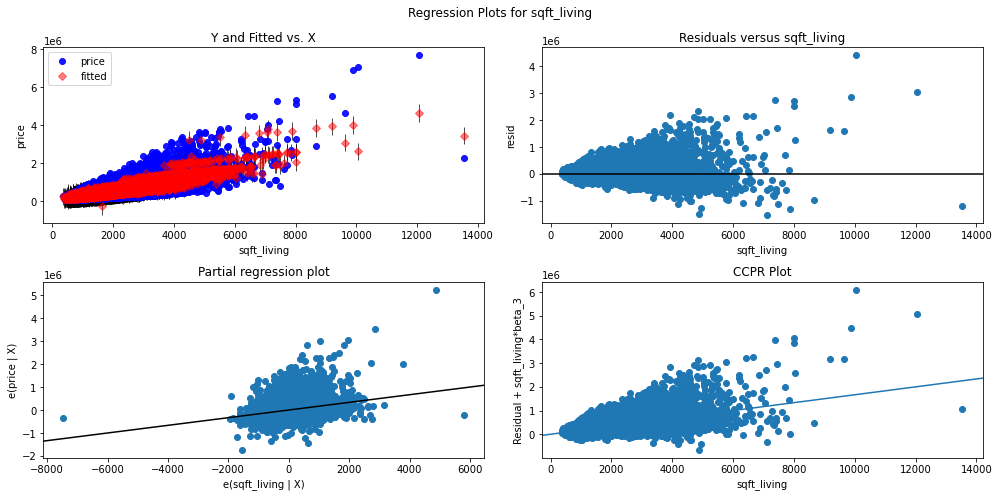

In [55]:
sm.graphics.plot_regress_exog(Second_model, 'sqft_living', fig=plt.figure(figsize=(14,7)));

In [56]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

fit = smf.ols('y_model_2 ~ X_model_2', data=df_full).fit()
 
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
test_result_1 = sms.het_breuschpagan(fit.resid, fit.model.exog)
test_result_1

(3793.8477299906517, 0.0, 143.60261038457708, 0.0)

Until something is done about sqft_living then the models will violate the assumption of homoscedasticity. Now let's examine for multicollinearity:

In [57]:
vif_full = pd.DataFrame()
X_model_2.drop('const', axis=1, inplace=True)
vif_full["feature"] = X_model_2.columns
  
vif_full["VIF"] = [variance_inflation_factor(X_model_2.values, i)
                          for i in range(len(X_model_2.columns))]
  
print(vif_full)

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 feature           VIF
0               bedrooms  1.678714e+00
1              bathrooms  2.984055e+00
2            sqft_living  4.342679e+00
3                 floors  1.561411e+00
4           yr_renovated  3.057551e+04
5                  Month           inf
6                  grade           inf
7     Recently Renovated  2.952247e+00
8   Completed Renovation  3.032929e+04
9                   Fair  1.025997e+00
10                  Good  1.155067e+00
11                  Poor  1.016588e+00
12             Very Good  1.085901e+00
13              February           inf
14                 March           inf
15                 April           inf
16                   May           inf
17                  June           inf
18                  July           inf
19                August           inf
20             September           inf
21               October           inf
22              November           inf
23              December           inf
24                     3 

Some of the values are normal but many are far too high to be acceptable. There is a strong degree of multicollinearity in this 2nd model. It would probably be best to eliminate 'Month' and 'grade' since those columns are already explored further later on. Also, 'yr_renovated' and 'Completed Renovation' can be eliminated because every 'Recenty Renovated' home is, by definition, completed and 'Recently Renovated', I think, is more instructive since it doesn't cover as broad a time frame as 'Completed Renovation does. Also, it's time to log transform 'sqft_living' in order to address the heteroscedasticity of its residuals.

### Log transforming

In [58]:
continuous = ['sqft_living', 'price']
df_conti= df_full[continuous] 
log_names = [f'{column}_log' for column in df_conti.columns]
df_log = np.log(df_conti)
df_log.columns = log_names
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

In [59]:
df_log_normal = pd.concat([df_log_norm,df_full], axis=1)                           

In [60]:
X_log= df_log_normal.drop(['price', 'price_log','sqft_living', 'Completed Renovation', 'grade', 
                           'yr_renovated', 'Month'], axis=1)
y_log= df_log_normal['price_log']


In [61]:
X_log = sm.add_constant(X_log)
log_model=sm.OLS(endog=y_log, exog=X_log).fit()

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     970.9
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        17:23:43   Log-Likelihood:                -21415.
No. Observations:               21597   AIC:                         4.289e+04
Df Residuals:                   21566   BIC:                         4.314e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5553      0.039    -14.300      0.000      -0.631      -0.479
sqft_living_log        0.3675      0.009     40.985      0.000       0.350       0.385
bedrooms              -0.0567      0.006     -8.935      0.000      -0.069      -0.044
bathrooms              0.0001      0.010      0.013      0.990      -0.019       0.020
floors                 0.0203      0.010      1.978      0.048       0.000       0.040
Recently Renovated     0.5787      0.041     14.261      0.000       0.499       0.658
Fair                  -0.1777      0.051     -3.490      0.000      -0.277      -0.078
Good                   0.1820      0.011     16.788      0.000       0.161       0.203
Poor                   0.0398      0.122      0.326      0.745      -0.200       0.280
Very Good              0.4634      0.017     26.976      0.000       0.430       0.497
February               0.0206      0.028      0.738      0.461      -0.034       0.075
March                  0.1213      0.026      4.709      0.000       0.071       0.172
April                  0.1676      0.025      6.691      0.000       0.119       0.217
May                    0.0747      0.025      3.016      0.003       0.026       0.123
June                   0.0523      0.025      2.077      0.038       0.003       0.102
July                   0.0283      0.025      1.128      0.259      -0.021       0.078
August                 0.0249      0.026      0.971      0.332      -0.025       0.075
September              0.0272      0.026      1.047      0.295      -0.024       0.078
October                0.0406      0.026      1.575      0.115      -0.010       0.091
November               0.0182      0.027      0.671      0.502      -0.035       0.072
December              -0.0025      0.027     -0.091      0.927      -0.055       0.050
3                      0.1445      0.653      0.221      0.825      -1.136       1.425
4                     -0.2388      0.127     -1.880      0.060      -0.488       0.010
5                     -0.2584      0.045     -5.778      0.000      -0.346      -0.171
7                      0.2934      0.017     17.095      0.000       0.260       0.327
8                      0.6647      0.020     32.719      0.000       0.625       0.705
9                      1.1147      0.025     44.218      0.000       1.065       1.164
10                     1.5476      0.031     49.526      0.000       1.486       1.609
11                     2.0065      0.043     46.706      0.000       1.922       2.091
12                     2.5596      0.076     33.646      0.000       2.410       2.709
13                     3.3222      0.185     17.957      0.000       2.960       3.685
==============================================================================
Omnibus:                       54.783   Durbin

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


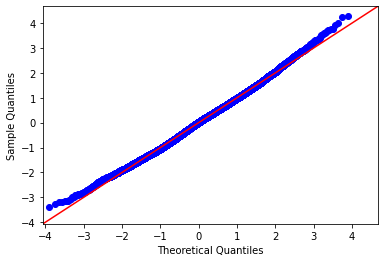

In [63]:
resid_log = log_model.resid

fig = sm.graphics.qqplot(resid_log, dist=stats.norm, line='45', fit=True)

In [64]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(log_model.resid)
list(zip(name, test))

[('Jarque-Bera', 55.17901193231452),
 ('Prob', 1.0423889536860933e-12),
 ('Skew', 0.12336173654499444),
 ('Kurtosis', 2.978879925497244)]

That looks good! The log transformation really had an effect.

In [65]:
vif_log = pd.DataFrame()
X_log.drop('const', axis=1, inplace=True)
vif_log["features"] = X_log.columns
  
vif_log["VIF"] = [variance_inflation_factor(X_log.values, i)
                          for i in range(len(X_log.columns))]
  
print(vif_log)

              features        VIF
0      sqft_living_log   2.625951
1             bedrooms  18.064253
2            bathrooms  23.064358
3               floors  12.868376
4   Recently Renovated   1.023906
5                 Fair   1.028472
6                 Good   1.509049
7                 Poor   1.016231
8            Very Good   1.163614
9             February   1.898976
10               March   2.351352
11               April   2.611415
12                 May   2.754766
13                June   2.605586
14                July   2.612932
15              August   2.398933
16           September   2.283957
17             October   2.355023
18            November   2.021897
19            December   2.064802
20                   3   1.002207
21                   4   1.021906
22                   5   1.127001
23                   7   5.439931
24                   8   5.273393
25                   9   3.516410
26                  10   2.382551
27                  11   1.647180
28            

These values look good except that 'bedrooms', 'bathrooms', and 'floors' all have high values. Bathrooms has a fairly high correlation with both so it may be best to eliminate 'bathrooms'.

 Now let's look at the scedasticity of 'sqft_living_log':

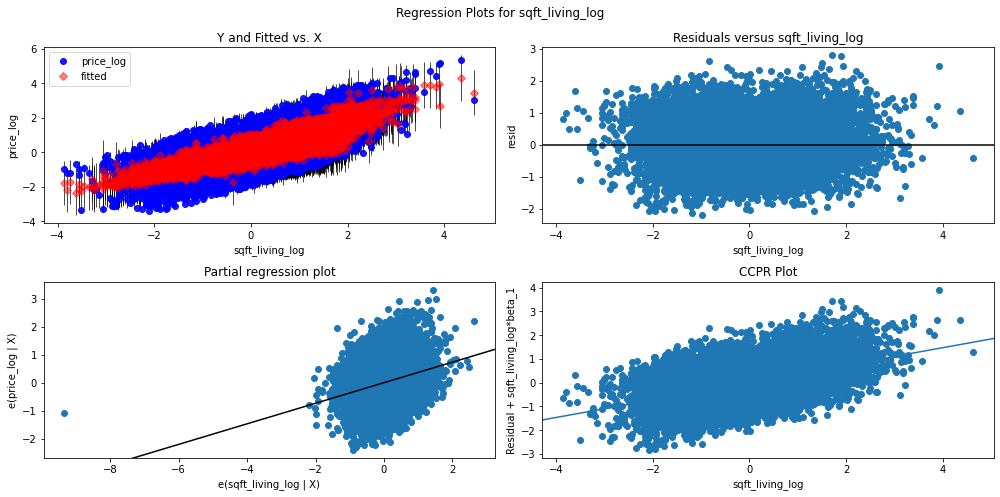

In [66]:
sm.graphics.plot_regress_exog(log_model, 'sqft_living_log', fig=plt.figure(figsize=(14,7)));

That looks great. Now, let's check for all the features using the Breusch-Pagan test:

In [67]:
import statsmodels.formula.api as smf
fit = smf.ols('price_log ~ X_log', data=df_log_normal).fit()
 
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
test_result

(459.01960655558486,
 2.905176375856164e-78,
 15.610474054635521,
 3.3746880441023666e-79)

In [68]:
model_sc = sm.OLS(y_log, sm.add_constant(X_log))
model_fit = model_sc.fit()
dataframe = pd.concat([X_log, y_log], axis=1)
dataframe

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,sqft_living_log,bedrooms,bathrooms,floors,Recently Renovated,Fair,Good,Poor,Very Good,February,...,4,5,7,8,9,10,11,12,13,price_log
0,-1.125556,3,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.401998
1,0.709446,3,2.25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279938
2,-2.131893,2,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.799430
3,0.070674,4,3.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499698
4,-0.292725,3,2.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.178434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.513206,3,2.50,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.483049
21593,0.458007,4,2.50,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.282955
21594,-1.469061,2,0.75,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.273005
21595,-0.407744,3,2.50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.282955


In [69]:
reg = ols("y_log ~ X_log", data=dataframe).fit()



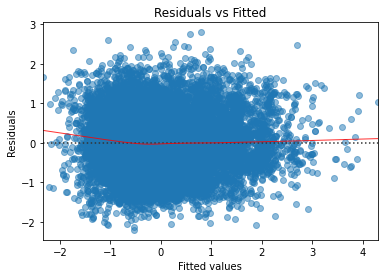

In [70]:
model_fitted_y = reg.fittedvalues

plot = sns.residplot(x=model_fitted_y, y='price_log', data=dataframe, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:713: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
C:\Users\isaia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


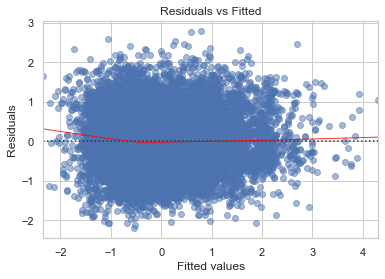

In [96]:
model_fitted_y = model_fit.fittedvalues
model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model_fit.get_influence().hat_matrix_diag
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

The p-values are all very low meaning that whe should reject the null hypothesis of homoscedasticity but the residual plot looks fairly homoscedastic. This is problematic.

Now let's drop bathrooms to eliminate multicollinearity and see how that affects the model:

In [72]:
X_log_2= df_log_normal.drop(['price','floors', 'bathrooms','bedrooms','price_log','sqft_living', 'Completed Renovation', 'grade', 
                           'yr_renovated', 'Month'], axis=1)

In [73]:
X_log_2 = sm.add_constant(X_log_2)
log_model_2=sm.OLS(endog=y_log, exog=X_log_2).fit()

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     1072.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        17:31:18   Log-Likelihood:                -21458.
No. Observations:               21597   AIC:                         4.297e+04
Df Residuals:                   21569   BIC:                         4.319e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7314      0.027    -27.174      0.000      -0.784      -0.679
sqft_living_log        0.3271      0.007     48.669      0.000       0.314       0.340
Recently Renovated     0.5697      0.041     14.043      0.000       0.490       0.649
Fair                  -0.1825      0.051     -3.581      0.000      -0.282      -0.083
Good                   0.1737      0.010     16.557      0.000       0.153       0.194
Poor                   0.0430      0.122      0.351      0.726      -0.197       0.283
Very Good              0.4530      0.017     26.619      0.000       0.420       0.486
February               0.0215      0.028      0.769      0.442      -0.033       0.076
March                  0.1209      0.026      4.685      0.000       0.070       0.172
April                  0.1687      0.025      6.719      0.000       0.119       0.218
May                    0.0766      0.025      3.088      0.002       0.028       0.125
June                   0.0531      0.025      2.107      0.035       0.004       0.103
July                   0.0310      0.025      1.234      0.217      -0.018       0.080
August                 0.0279      0.026      1.085      0.278      -0.022       0.078
September              0.0297      0.026      1.140      0.254      -0.021       0.081
October                0.0429      0.026      1.661      0.097      -0.008       0.093
November               0.0208      0.027      0.762      0.446      -0.033       0.074
December              -0.0013      0.027     -0.049      0.961      -0.054       0.052
3                      0.1704      0.655      0.260      0.795      -1.113       1.454
4                     -0.2318      0.127     -1.822      0.068      -0.481       0.018
5                     -0.2613      0.045     -5.833      0.000      -0.349      -0.174
7                      0.2980      0.017     17.451      0.000       0.265       0.331
8                      0.6883      0.020     35.117      0.000       0.650       0.727
9                      1.1518      0.024     47.387      0.000       1.104       1.199
10                     1.5976      0.030     52.853      0.000       1.538       1.657
11                     2.0644      0.042     49.369      0.000       1.982       2.146
12                     2.6314      0.075     35.041      0.000       2.484       2.779
13                     3.3905      0.184     18.387      0.000       3.029       3.752
==============================================================================
Omnibus:                       49.096   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.410
Skew:                           0.116   Prob(JB):                     1.87e-11
Kurtosis:                       2.972   Cond. No.                     

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


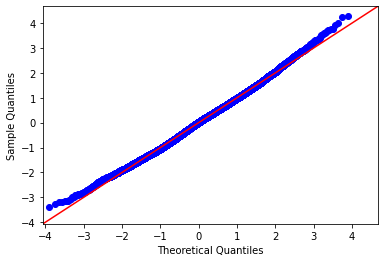

In [75]:
resid_log_2 = log_model_2.resid

fig = sm.graphics.qqplot(resid_log, dist=stats.norm, line='45', fit=True)

The fit is still great. So, the Assumption of Linearity is satisfied.

In [76]:
vif_data = pd.DataFrame()
X_log_2.drop('const', axis=1, inplace=True)

vif_data["feature"] = X_log_2.columns

  
vif_data["VIF"] = [variance_inflation_factor(X_log_2.values, i)
                          for i in range(len(X_log_2.columns))]
  
print(vif_data)

               feature       VIF
0      sqft_living_log  2.053015
1   Recently Renovated  1.018634
2                 Fair  1.025108
3                 Good  1.423775
4                 Poor  1.015672
5            Very Good  1.134274
6             February  1.494532
7                March  1.741837
8                April  1.900609
9                  May  1.995964
10                June  1.907962
11                July  1.916397
12              August  1.784025
13           September  1.720896
14             October  1.751809
15            November  1.577817
16            December  1.603822
17                   3  1.002152
18                   4  1.020470
19                   5  1.110115
20                   7  4.100640
21                   8  3.622880
22                   9  2.597850
23                  10  1.909501
24                  11  1.422548
25                  12  1.110071
26                  13  1.023502


Great! The multicollinearity problems are gone! Another assumption satisfied! so let's check for homoscedasticity.

In [77]:
model_sc_2 = sm.OLS(y_log, sm.add_constant(X_log_2))
model_fit_2 = model_sc_2.fit()
dataframe_sced_check = pd.concat([X_log_2, y_log], axis=1)
dataframe_sced_check

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,sqft_living_log,Recently Renovated,Fair,Good,Poor,Very Good,February,March,April,May,...,4,5,7,8,9,10,11,12,13,price_log
0,-1.125556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.401998
1,0.709446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279938
2,-2.131893,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.799430
3,0.070674,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499698
4,-0.292725,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.178434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.513206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.483049
21593,0.458007,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.282955
21594,-1.469061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.273005
21595,-0.407744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.282955


In [78]:
reg_2 = ols("price_log ~ X_log_2", data=dataframe).fit()


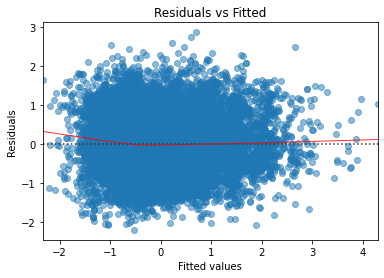

In [79]:
model_fitted_y_2 = reg_2.fittedvalues

plot = sns.residplot(x=model_fitted_y_2, y='price_log', data=dataframe_sced_check, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

In [80]:
dataframe_sced_check

,sqft_living_log,Recently Renovated,Fair,Good,Poor,Very Good,February,March,April,May,...,4,5,7,8,9,10,11,12,13,price_log
0,-1.125556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.401998
1,0.709446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279938
2,-2.131893,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.799430
3,0.070674,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499698
4,-0.292725,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.178434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.513206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.483049
21593,0.458007,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.282955
21594,-1.469061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.273005
21595,-0.407744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.282955


In [81]:
import statsmodels.formula.api as smf
fit_2 = smf.ols('price_log ~ X_log_2', data=dataframe_sced_check).fit()
 
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
test_result_2 = sms.het_breuschpagan(fit_2.resid, fit_2.model.exog)
test_result_2

(327.076306644832,
 2.803400474959948e-53,
 12.284271303790154,
 9.840713420901154e-54)

Ok, the p-values have decreased dramatically but they are still too small to reject the alternative hyopthesis of heteroscedasticity. This is frustrating because it contradicts the above residual plot. However, this model looks excellent in every other way to let's use it to see how price is affected and to answer our initial questions.

### Visualizations

For a 10% increase in square footage:

In [82]:
print('There is a' ,(1.1 ** .3217),'% increase in price')

There is a 1.031136183275616 % increase in price


For a 15% increase in square footage:

In [83]:
print('There is a' ,(1.15 ** .3217)/100,'% increase in price')

There is a 0.01045987501650118 % increase in price


Let's use the mean value for price and see how much different increases affect price:

In [84]:
df['price'].mean()

540296.5735055795

In [85]:
from operator import itemgetter, attrgetter
Improvement_Percentage={'Average Price':(1*df['price'].mean()),
                        '5%':((1.05**.3217)*df['price'].mean()),
                        '10%': ((1.1**.3217)*df['price'].mean()),
                        '15%':((1.15**.3217)*df['price'].mean()),
                        '20%': ((1.2**.3217)*df['price'].mean())  }
Nums=sorted(Improvement_Percentage.items(), key=itemgetter(1))
Improvement_Numbers= pd.DataFrame(Nums)
Improvement_Numbers.rename( columns={0 :'% Change', 1:'Value'}, inplace=True )
Improvement_Numbers

,% Change,Value
0,Average Price,540296.573506
1,5%,548843.860968
2,10%,557119.346641
3,15%,565143.463071
4,20%,572934.296195


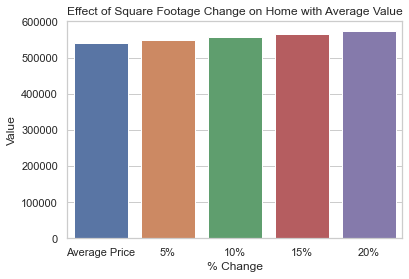

In [86]:

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="% Change", y="Value", data=Improvement_Numbers)
ax.set_title("Effect of Square Footage Change on Home with Average Value");

Now let's see the difference in price between a house that has an Average grade, a Good grade, and a Very Good grade:

In [87]:
(.1737 *100)/10#(to account for log transforming)

1.737

Average to Very Good:

In [88]:
.4530 *100#(to account for log transforming)

45.300000000000004

In [89]:
pd.options.display.float_format = '{:.2f}'.format
Grades={'Average':df['price'].mean(),
        'Good':((.1737 *100)/10)*df['price'].mean(),
        'Very Good': ((.4530 *100)/10)*df['price'].mean(),
                        }
Nums_2=sorted(Grades.items(), key=itemgetter(1))
Grade_changes= pd.DataFrame(Nums_2)
Grade_changes.rename( columns={0 :'Grade', 1:'Value'}, inplace=True )
Grade_changes

,Grade,Value
0,Average,540296.57
1,Good,938495.15
2,Very Good,2447543.48


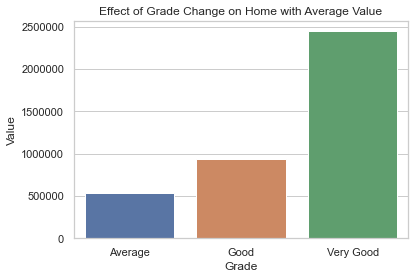

In [90]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
ax = sns.barplot(x="Grade", y="Value", data=Grade_changes)
ax.set_title("Effect of Grade Change on Home with Average Value");

Obviously, improving the grade of your home can have a monumental effect. For the average house, with a value of  540,296 dollars improving your house's grade from Average to Good can improve its value by almost 400k. And, improving the grade to very good yields an almost  2 million dollar profit!

Here's the % change between a Recently Renovated home and a home that has not been Recently Renovated:

In [91]:
print ((.5697 *100), '% change')

56.97 % change


In [92]:
df_log_normal['price']

0       221900.00
1       538000.00
2       180000.00
3       604000.00
4       510000.00
           ...   
21592   360000.00
21593   400000.00
21594   402101.00
21595   400000.00
21596   325000.00
Name: price, Length: 21597, dtype: float64

In [93]:
df_log_normal['reno_prices']=df_log_normal['price']*1.5697
not_reno_prices=df_log_normal['price']

In [94]:
pd.options.display.float_format = '{:.2f}'.format
Renovated={'Not Renovated':df['price'].mean(),
        'Renovated':1.5697*df['price'].mean()}
Nums_3=sorted(Renovated.items(), key=itemgetter(1))
Renovated_or_Not= pd.DataFrame(Nums_3)
Renovated_or_Not.rename( columns={0 :'Renovated or Not', 1:'Value'}, inplace=True )
Renovated_or_Not

,Renovated or Not,Value
0,Not Renovated,540296.57
1,Renovated,848103.53


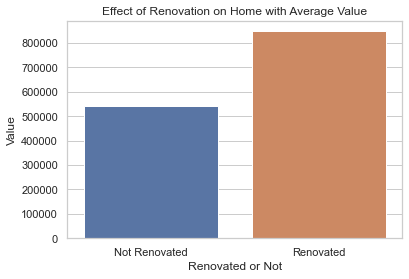

In [95]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
ax = sns.barplot(x='Renovated or Not', y='Value', data=Renovated_or_Not)
ax.set_title("Effect of Renovation on Home with Average Value");

Wow, so renovating in the last 10 years yields a 56% increase in home value. So, for the average King County area house, with a value of 540k, the house price will increase almost 308k! It really pays to renovate before you sell.

### Recommendations

1. Improving the square footage has an effect on price but perhaps not as strong as I thought. A homeowner's resources may be better spent elsewhere. 

2. Improving the grade of an Average house can have a monumental effect on sale price. So a homeowner should do so, if at all possible.

3. Renovating the house sometime in the 10 years before you sell also has a 56.97%  positive effect on sale price. So a homeowner should do so, if at all possible.

## Conclusion

Overall, it looks good but there are certainly some concerns. The seeming heteroscedascity of the residuals of the model is worry and may suggest that another modeling method may be superior. However, all the other assumptions were respected. We also should be weary of generalizing too much with this data since it is from a very unique real estate market where prices have continued to rise over the last few decades. Comparing the Seattle area with other areas of comparable size may not work since Seattle is home to so much wealth. 

Even so, this study, at the very least provides very useful information for any King County, WA homeowner on how they can improve the value of their home. While increasing square footage is not as important, improving the grade and a recent renovation will yield high sale prices for homeowners. Since home is where the heart is, homeowners may rest easier if they  renovate and improve their homes' grade before they sell!

You can find the full repository here:

https://github.com/icapeli/phase_2_project

Thanks!!